# Polynomial approximation

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [2]:
image_file = 'goat.png'

In [3]:
image = cv.imread(image_file)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

[ WARN:0@3.596] global loadsave.cpp:241 findDecoder imread_('goat.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


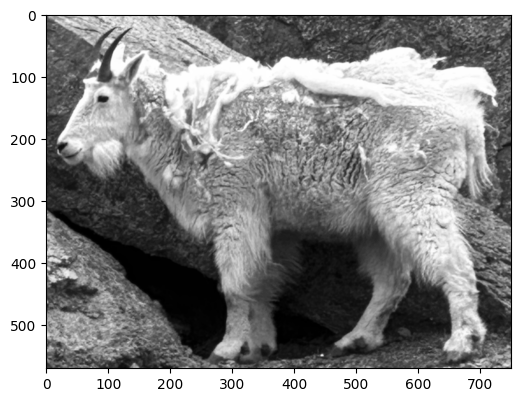

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray');

In [23]:
h, w = image.shape
print(f'image resolution = {h}x{w}')

image resolution = 571x751


In [24]:
patch_half_width = 2

In [25]:
def fit_polynomial(patch, degree, debug=False):
    I = patch.reshape(-1,1).astype('float')
    hw = len(patch) // 2
    x = np.arange(-hw,hw+1).reshape(-1,1).astype('float')
    print('intensities:\n', I) if debug else None
    locs = np.tile(x,(1,degree+1))
    print('pixel locations:\n', locs) if debug else None
    for i in range(degree+1):
        locs[:,i] = np.power(locs[:,i],i) / math.factorial(i)
    print('locations:\n', locs) if debug else None
    d, _, _, _ = np.linalg.lstsq(locs, I, rcond=None) 
    print('derivatives:\n', d) if debug else None  
    return d

In [27]:
degree = 3
result = np.empty((h,w,degree+1), dtype='float')

for y in range(0, h):
    for x in range(patch_half_width, w - patch_half_width):
        patch = image[y, (x - patch_half_width) : (x + patch_half_width + 1)]
        d = fit_polynomial(patch=patch, degree=degree, debug=False)
        result[y, x, :] = d.reshape(4)

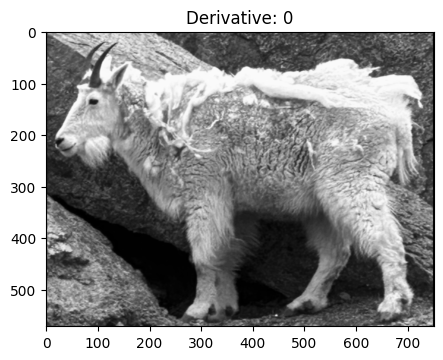

In [45]:
derivative = 0 # values between 0 and degree
plt.figure(figsize=(5,5))
plt.title(f'Derivative: {derivative}')
plt.imshow(result[:,:,derivative], cmap='gray', norm='linear');